In [ ]:
!pip install pyforest
import pyforest
import warnings 
warnings.filterwarnings('ignore')

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=65958b6376ce3599528ffd00b5dfc24a3f932b6af0f809b15d09dff070763154
  Stored in directory: /root/.cache/pip/wheels/40/c6/da/43562aeea85b37f1a2b3d326f0f602f865000d2ada8a43625f
Successfully built pyforest


In [ ]:
df = pd.read_csv('/content/Employee Satisfaction Index.csv')
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'emp_id', 'age', 'Dept', 'location', 'education',
       'recruitment_type', 'job_level', 'rating', 'onsite', 'awards',
       'certifications', 'salary', 'satisfied'],
      dtype='object')

In [ ]:
del df['Unnamed: 0']
del df['emp_id']

In [ ]:
df.describe()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [ ]:
df.head()

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

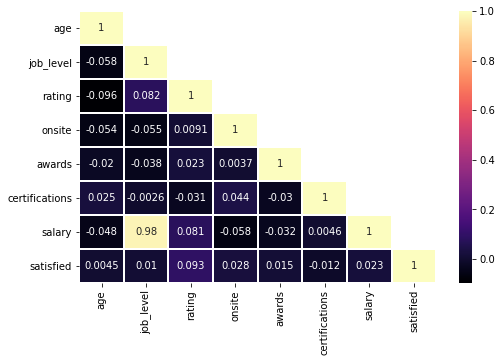

In [ ]:
plt.figure(figsize = (8,5)) 
cor = df.corr()
np.tril(np.ones(cor.shape)).astype(np.bool)
Lower_M = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(Lower_M,cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [ ]:
df['Dept'].unique()

array(['HR', 'Technology', 'Sales', 'Purchasing', 'Marketing'],
      dtype=object)

In [ ]:
df['location'].unique()

array(['Suburb', 'City'], dtype=object)

In [ ]:
df['education'].unique()

array(['PG', 'UG'], dtype=object)

In [ ]:
df['recruitment_type'].unique()

array(['Referral', 'Walk-in', 'On-Campus', 'Recruitment Agency'],
      dtype=object)

In [ ]:
df.shape

(500, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               500 non-null    int64 
 1   Dept              500 non-null    object
 2   location          500 non-null    object
 3   education         500 non-null    object
 4   recruitment_type  500 non-null    object
 5   job_level         500 non-null    int64 
 6   rating            500 non-null    int64 
 7   onsite            500 non-null    int64 
 8   awards            500 non-null    int64 
 9   certifications    500 non-null    int64 
 10  salary            500 non-null    int64 
 11  satisfied         500 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 47.0+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

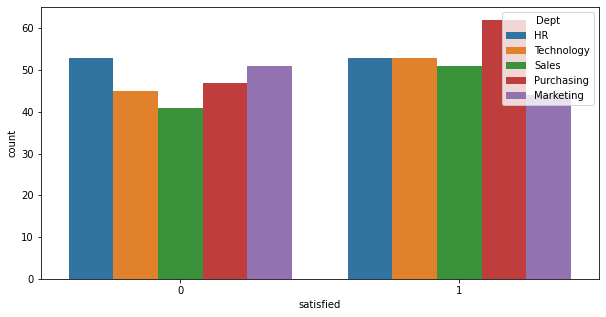

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'satisfied', hue = 'Dept', data = df) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

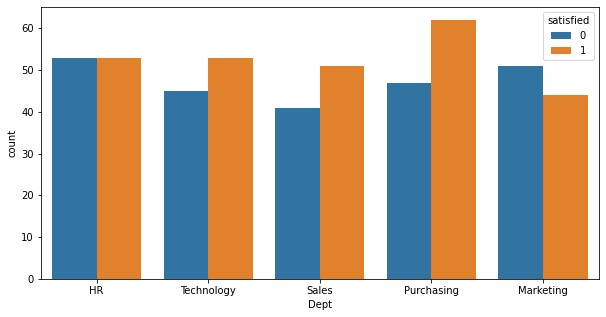

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Dept', hue = 'satisfied', data = df)

<IPython.core.display.Javascript object>

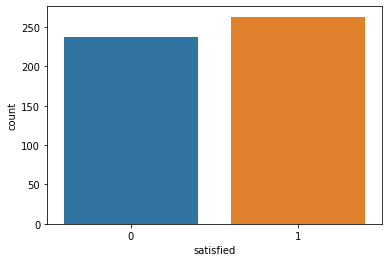

In [ ]:
sns.countplot(x = 'satisfied', data = df)

In [ ]:
df['satisfied'].value_counts(normalize = True)

1    0.526
0    0.474
Name: satisfied, dtype: float64

<IPython.core.display.Javascript object>

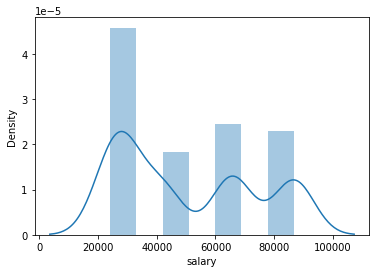

In [ ]:
sns.distplot(df['salary'])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Dept']= label_encoder.fit_transform(df['Dept'])
df['Dept'].value_counts()

2    109
0    106
4     98
1     95
3     92
Name: Dept, dtype: int64

In [ ]:
var1 = pd.get_dummies(df['location'], drop_first = True)
df = df.join(var1) 
df.drop('location', axis = 1, inplace = True)

<IPython.core.display.Javascript object>

In [ ]:
var2 = pd.get_dummies(df['education'], drop_first = True)
df = df.join(var2) 
df.drop('education', axis = 1, inplace = True)

<IPython.core.display.Javascript object>

In [ ]:
df['recruitment_type']= label_encoder.fit_transform(df['recruitment_type'])
df['recruitment_type'].value_counts()

0    133
2    131
3    128
1    108
Name: recruitment_type, dtype: int64

In [ ]:
df.head()

,age,Dept,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,Suburb,UG
0,28,0,2,5,2,0,1,0,86750,1,1,0
1,50,4,3,3,5,1,2,1,42419,0,1,0
2,43,4,2,4,1,0,2,0,65715,0,1,1
3,44,3,0,2,3,1,0,0,29805,1,0,0
4,33,0,1,2,1,0,5,0,29805,1,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
X = df.drop(['satisfied'],axis = 1)
y = df['satisfied']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0, 35],
       [ 0, 40]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5333333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred1 = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[15, 20],
       [22, 18]])

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.44


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

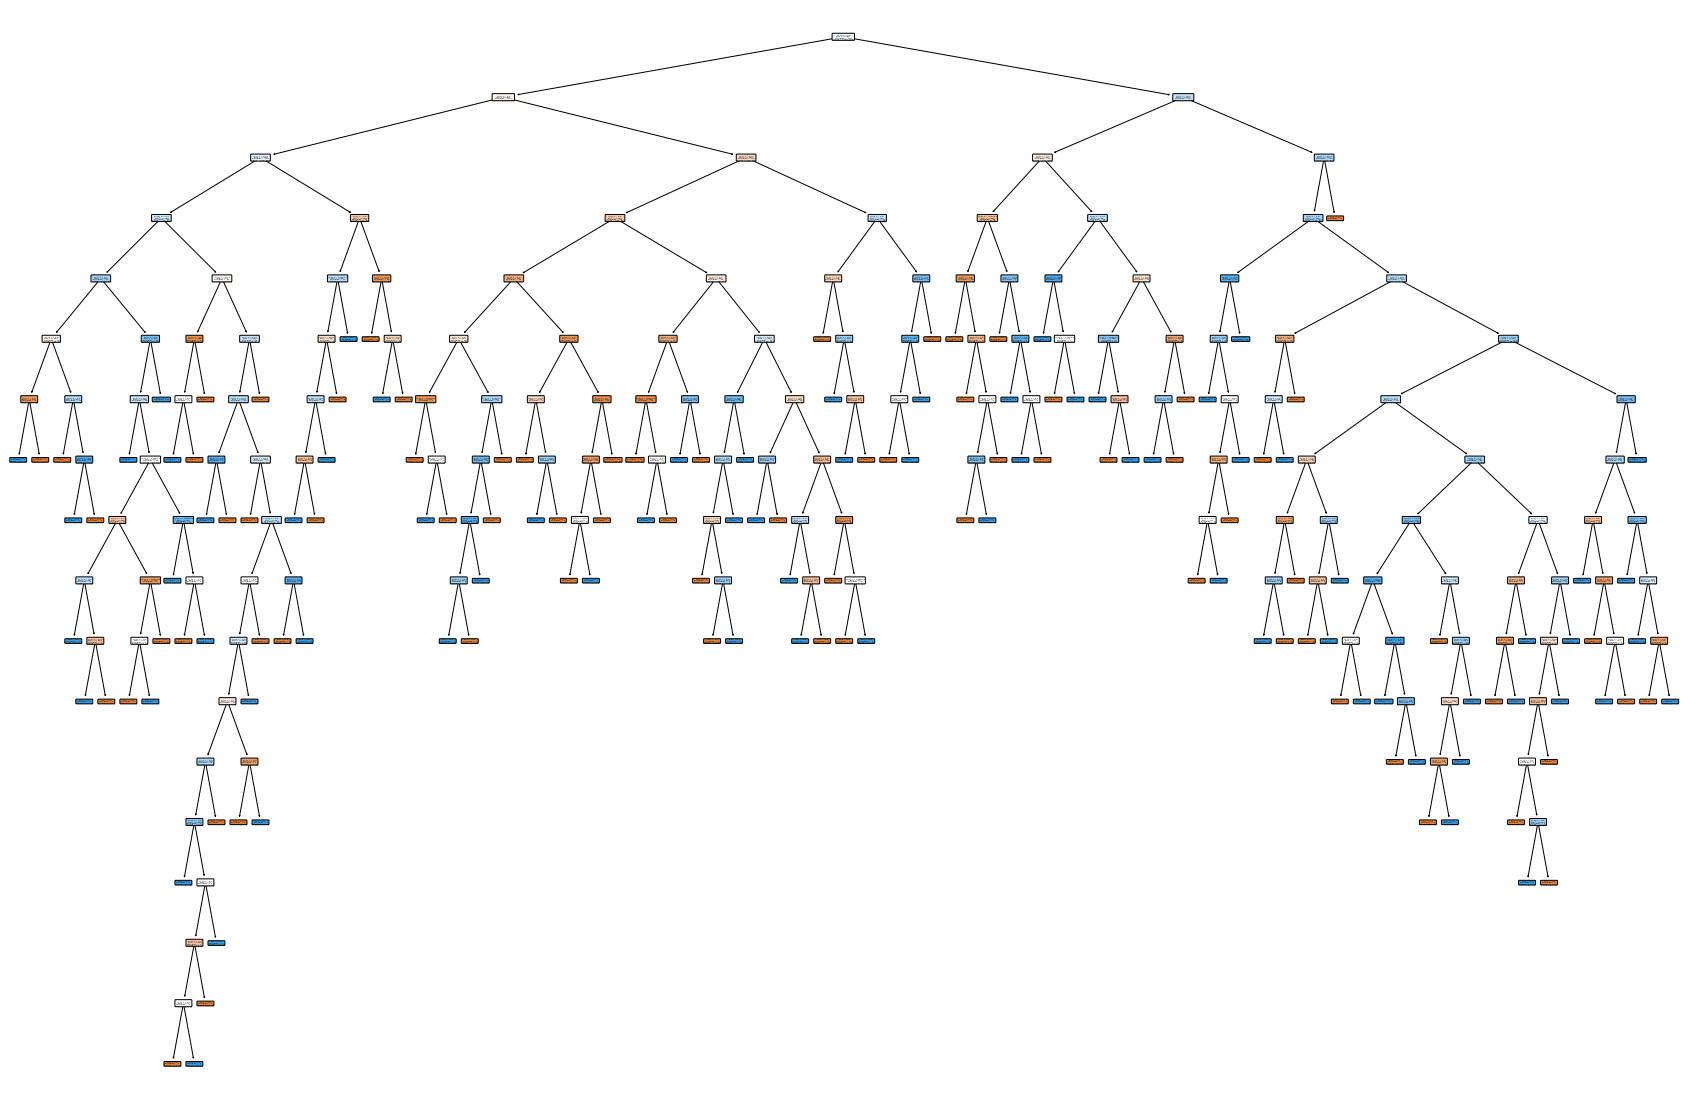

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
img = tree.plot_tree(model, filled = True, rounded = True)
plt.show()